In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()  # This line is commented out as the file is assumed to be already uploaded

df=pd.read_csv('cars new.csv')

Saving cars new.csv to cars new.csv


In [ ]:
df.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


In [ ]:
df.describe()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
count,6308,6308,6308,5684,6308,6308,6308,6308,6308
unique,2546,3395,129,10,330,169,82,82,7
top,Mercedes-Benz C-Class 2022 C 300,TBD,2.0,4,150,250,5 Seater,mercedes-benz,uae
freq,10,437,1241,2856,162,1100,3471,560,1248


In [ ]:
for clm in ['car name','brand','country','price','engine_capacity','cylinder','horse_power','top_speed','seats']:
    print(f'Name: {clm} dtype: {df[clm].dtype}\n')
    print(f'{df[clm].value_counts()}\n')
    print(('-' * 80) + '\n\n')

Name: car name dtype: object

car name
Mercedes-Benz C-Class 2022 C 300                          10
Fiat 500e 2021 La Prima                                    7
Porsche 911 2021 Carrera S Cabriolet                       7
Porsche 911 2021 Carrera 4S                                7
Kia Rio Sedan 2021 1.6L MPI                                7
                                                          ..
Jaguar F-Type Convertible 2021 2.0T R-Dynamic (300 PS)     1
Hyundai Kona 2021 1.6L T-GDI GLS Premium (AWD)             1
Chevrolet Trax 2021 1.8L Premier AWD                       1
Jaguar XF 2021 3.0 V6 SC R Sport                           1
Lamborghini Aventador Ultimae 2022 LP 780-4                1
Name: count, Length: 2546, dtype: int64

--------------------------------------------------------------------------------


Name: brand dtype: object

brand
mercedes-benz    560
audi             398
bmw              394
toyota           378
ford             323
                ... 
tata   

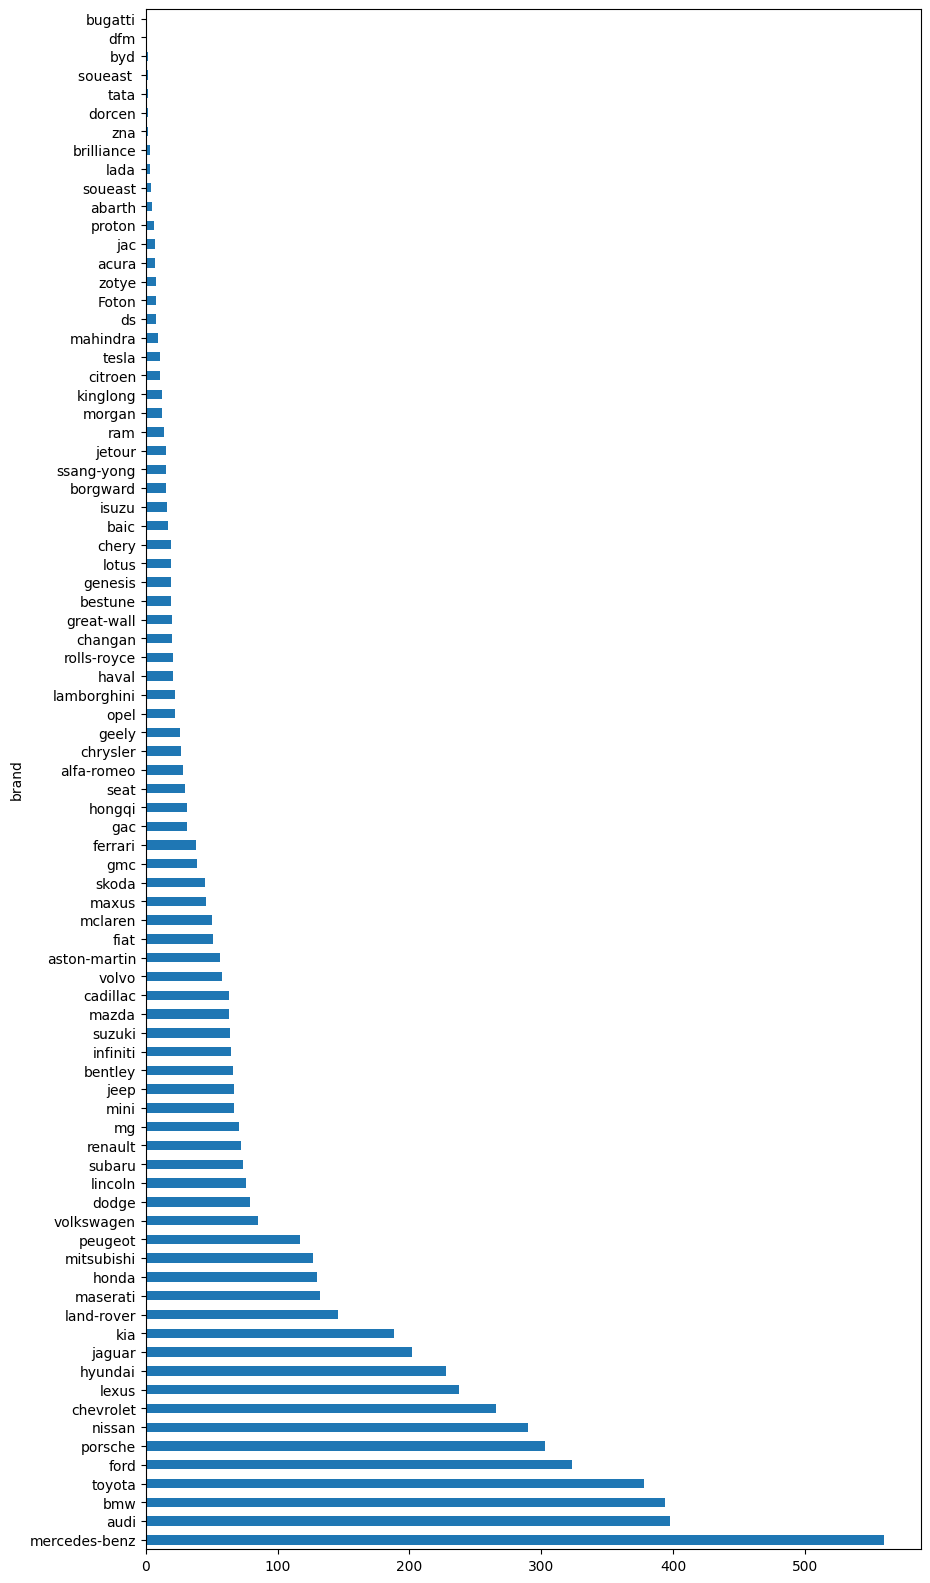

In [ ]:
df['brand'].value_counts().plot.barh(figsize=(10,20));


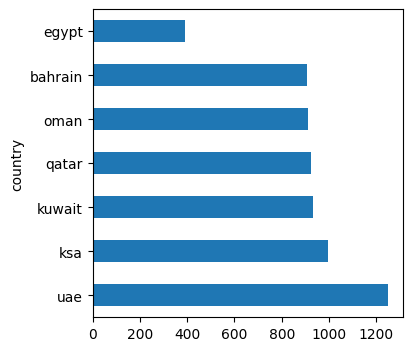

In [ ]:
df['country'].value_counts().plot.barh(figsize=(4,4));


In [ ]:
# This are some value I found symple by searching in the web

LIMIT_HOURSE_POWER = 1_500.0
LIMIT_KMH = 530.0
LIMIT_ENGINE_CAPACITY = 8.4
LIMIT_CYLINDER_NR = 16.0

In [ ]:
def add_columns_by_function(df, clm, function, new_clms):
    new_data = df[clm].apply(function).apply(pd.Series)
    new_data.columns = new_clms
    df = pd.concat([df, new_data], axis=1)
    return df

In [ ]:
def apply_price_adj(price):
    try:
        # Extract the currency code (first 3 characters)
        c = price[:3]
        # Extract the price string (everything after the currency code)
        price_str = price[4:].replace(',', '')  # Remove thousand separators

        # Convert price to float
        p = float(price_str)

        pe = p # Euros
        pd = p # Dollar

        # Currency conversion rates
        conversion_rates = {
            'AED': (0.24, 0.27),
            'KWD': (2.93, 3.28),
            'OMR': (2.32, 2.60),
            'BHD': (2.37, 2.65),
            'QAR': (0.27, 0.25),
            'SAR': (0.24, 0.27),
            'EGP': (0.018, 0.021)
        }

        # Adjust price based on currency
        if c in conversion_rates:
            pe, pd = [p * rate for rate in conversion_rates[c]]

        return [p, c, pe, pd]

    except (ValueError, IndexError) as e:
        # Return error values in a consistent format
        return [-1, 'ERR', -1, -1]

In [ ]:
df_upd = df

# adjust price
df_upd = add_columns_by_function(df_upd, 'price', apply_price_adj, ['price_country', 'price_currency', 'price_euro', 'price_dollar'])

# adjust engine_capacity
df_upd['engine_capacity_float'] = pd.to_numeric(df_upd['engine_capacity'], errors='coerce')
df_upd['engine_capacity_l'] = np.where(df_upd['engine_capacity_float'] <= LIMIT_ENGINE_CAPACITY, df_upd['engine_capacity_float'], -1)

# adjust cylinder
df_upd['cylinder_float'] = pd.to_numeric(df_upd['cylinder'], errors='coerce')
df_upd['cylinder_nr'] = np.where(df_upd['cylinder_float'] <= LIMIT_CYLINDER_NR, df_upd['cylinder_float'], -1)
df_upd['is_eletric'] = np.where((df_upd['cylinder'] == 'N/A, Electric') | (df_upd['engine_capacity_l'] == 0), True, False)

# adjust horse_power
df_upd['horse_power_float'] = pd.to_numeric(df_upd['horse_power'], errors='coerce')
df_upd['horse_power_cv'] = np.where(df_upd['horse_power_float'] <= LIMIT_HOURSE_POWER, df_upd['horse_power_float'], -1)

# adjust top_speed
df_upd['top_speed_float'] = pd.to_numeric(df_upd['top_speed'], errors='coerce')
df_upd['top_speed_kmh'] = np.where(df_upd['top_speed_float'] <= LIMIT_KMH, df_upd['top_speed_float'], -1)

# adjust country
mapping = {
    'uae':'United Arab Emirates',
    'ksa':'Saudi Arabia',
    'kuwait':'Kuwait',
    'qatar':'Qatar',
    'oman':'Oman',
    'bahrain': 'Bahrain',
    'egypt': 'Egypt'
}
df_upd = df_upd.replace(mapping)

df_upd.drop(['seats', 'engine_capacity_float', 'cylinder_float', 'horse_power_float', 'top_speed_float'], axis=1, inplace=True)

df_upd

,car name,price,engine_capacity,cylinder,horse_power,top_speed,brand,country,price_country,price_currency,price_euro,price_dollar,engine_capacity_l,cylinder_nr,is_eletric,horse_power_cv,top_speed_kmh
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,fiat,Saudi Arabia,-1.0,ERR,-1.0,-1.00,0.0,-1.0,True,-1.0,-1.0
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,peugeot,Saudi Arabia,140575.0,SAR,33738.0,37955.25,2.0,4.0,False,180.0,-1.0
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,suzuki,Saudi Arabia,98785.0,SAR,23708.4,26671.95,1.5,4.0,False,102.0,145.0
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,ford,Saudi Arabia,198000.0,SAR,47520.0,53460.00,2.3,4.0,False,420.0,-1.0
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,honda,Saudi Arabia,-1.0,ERR,-1.0,-1.00,1.8,4.0,False,140.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Bentley Mulsanne 2021 6.75L V8 Extended Wheelbase,DISCONTINUED,6.8,8,505,296,bentley,United Arab Emirates,-1.0,ERR,-1.0,-1.00,6.8,8.0,False,505.0,296.0
6304,Ferrari SF90 Stradale 2021 4.0T V8 Plug-in-Hybrid,"AED 1,766,100",4.0,8,25,800,ferrari,United Arab Emirates,1766100.0,AED,423864.0,476847.00,4.0,8.0,False,25.0,-1.0
6305,Rolls Royce Wraith 2021 6.6L Base,"AED 1,400,000",6.6,12,624,250,rolls-royce,United Arab Emirates,1400000.0,AED,336000.0,378000.00,6.6,12.0,False,624.0,250.0
6306,Lamborghini Aventador S 2021 6.5L V12 Coupe,"AED 1,650,000",6.5,NaN,740,350,lamborghini,United Arab Emirates,1650000.0,AED,396000.0,445500.00,6.5,-1.0,False,740.0,350.0


In [ ]:
# Describe car types and where they are from!

# Display car information by brand and country of origin.
for brand in df_upd['brand'].unique():
  brand_data = df_upd[df_upd['brand'] == brand]
  countries = brand_data['country'].unique()
  print(f"Brand: {brand}")
  print(f"  Countries: {', '.join(countries)}")
  print("-" * 20)


Brand: fiat
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: peugeot
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: suzuki
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: ford
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: honda
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: renault
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: aston-martin
  Countries: Saudi Arabia, Egypt, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: gac
  Countries: Saudi Arabia, Bahrain, Qatar, Oman, Kuwait, United Arab Emirates
--------------------
Brand: toyota
  Countries: Saudi Arabia, Egypt,



*** THE EPIC CAR DATA ADVENTURE! ***

Hold onto your hats, folks, because we've unearthed some *hilarious* insights from this car data!


**Pricey Pals by Country:**
Turns out, some countries are *way* more extravagant with their rides. Check out the boxplot – it’s like a rollercoaster of prices!


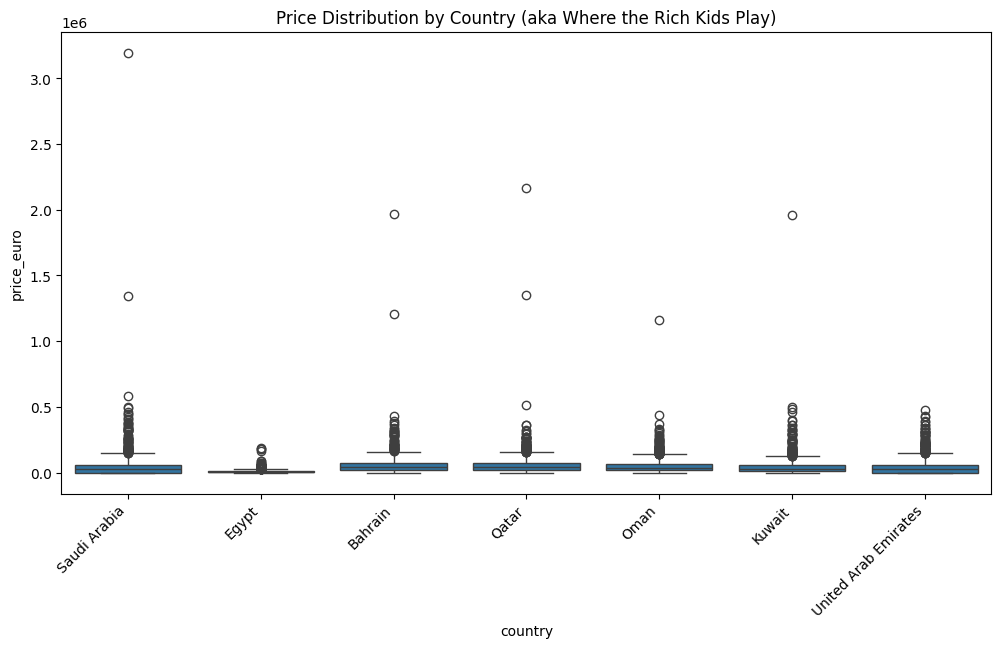



**Horsepower Havoc vs. Top Speed:**
Behold! The horsepower-top speed showdown. Some cars are like speedy cheetahs; others… well, let’s just say they're more like tortoises with spoilers. 


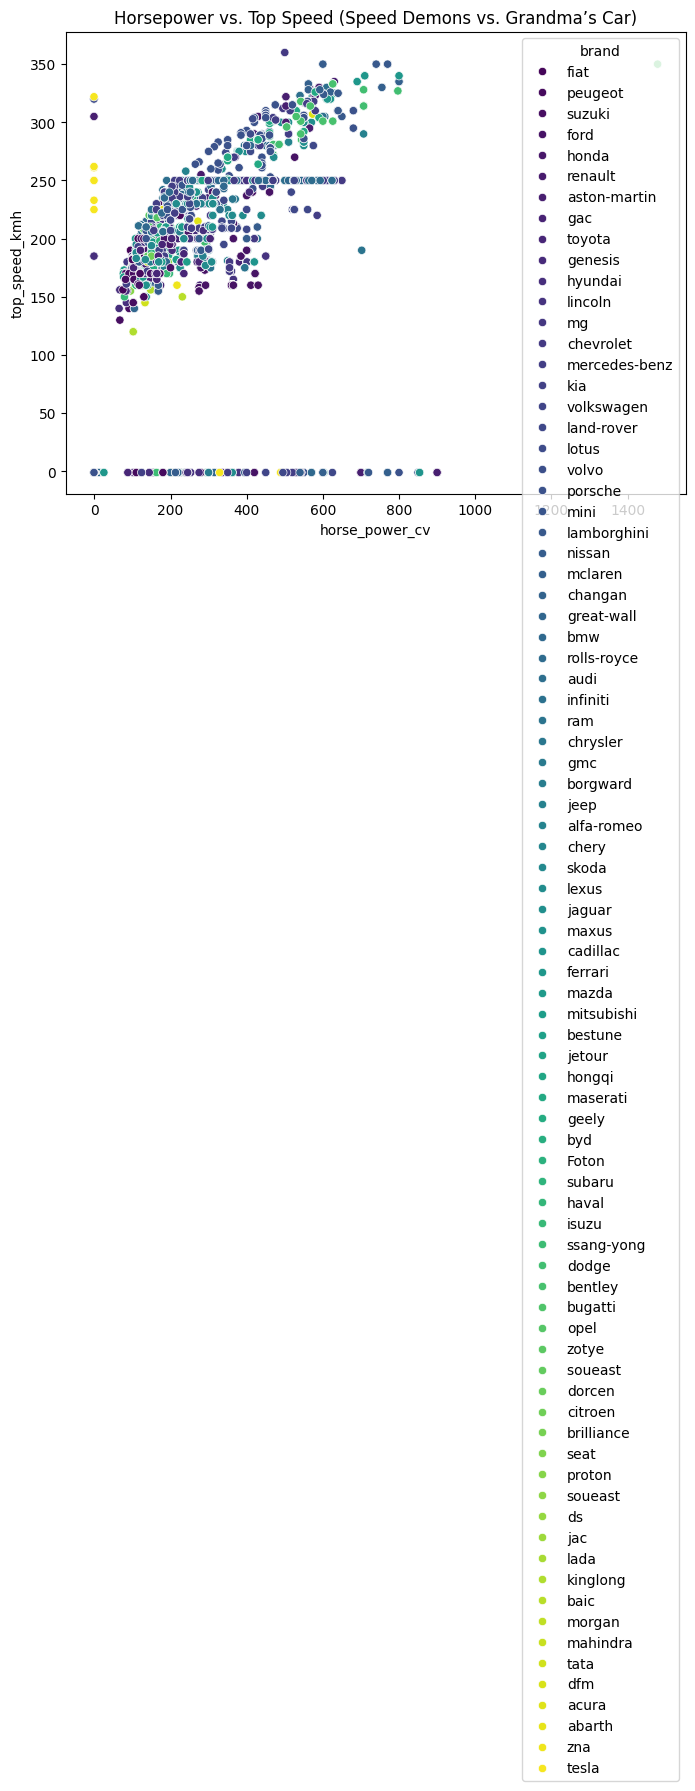



**Brand Bonanza:**
This chart shows which brands are the most popular. Are they all awesome, or just popular by accident? You decide!


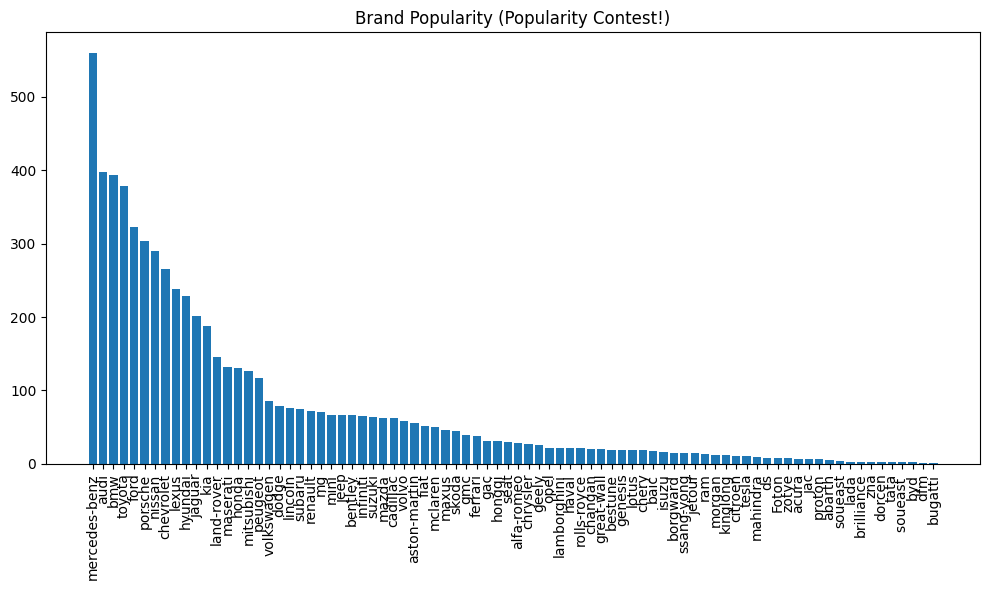



**Engine Capacity vs. Cylinder Number:**
Here we see how engine size relates to number of cylinders.  Does more cylinders *always* equal more speed? Find out below! And a bonus hint: Electric cars might mess with the traditional notions!


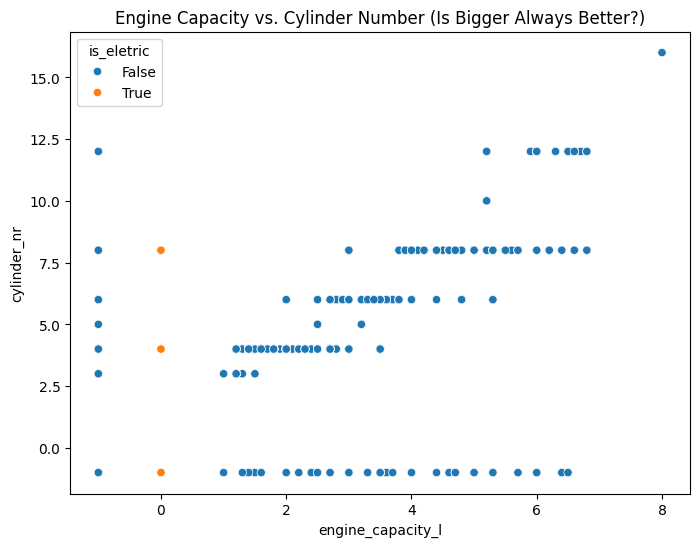



**Price Distribution:** A histogram of the price distribution shows that most of the cars are on the cheaper end of the spectrum.


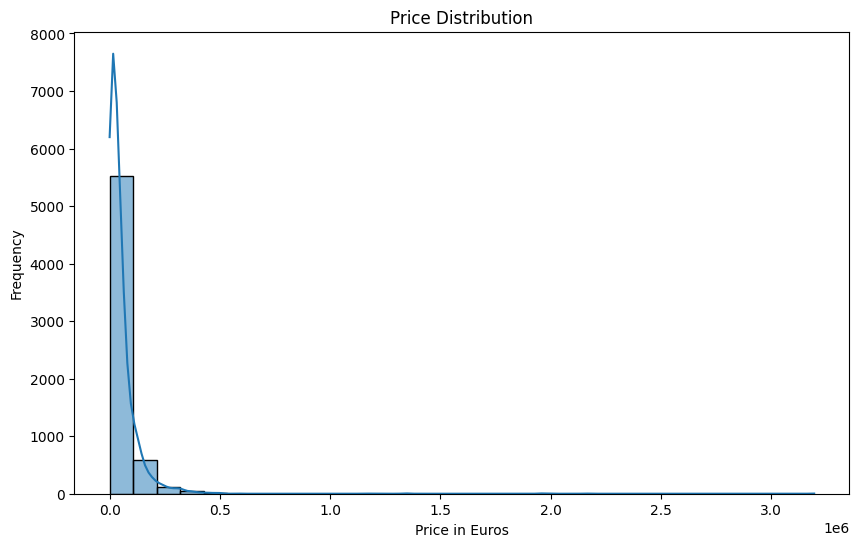



**Price vs. Engine by Country:** This series of plots explores how price and engine size interact across different countries. 


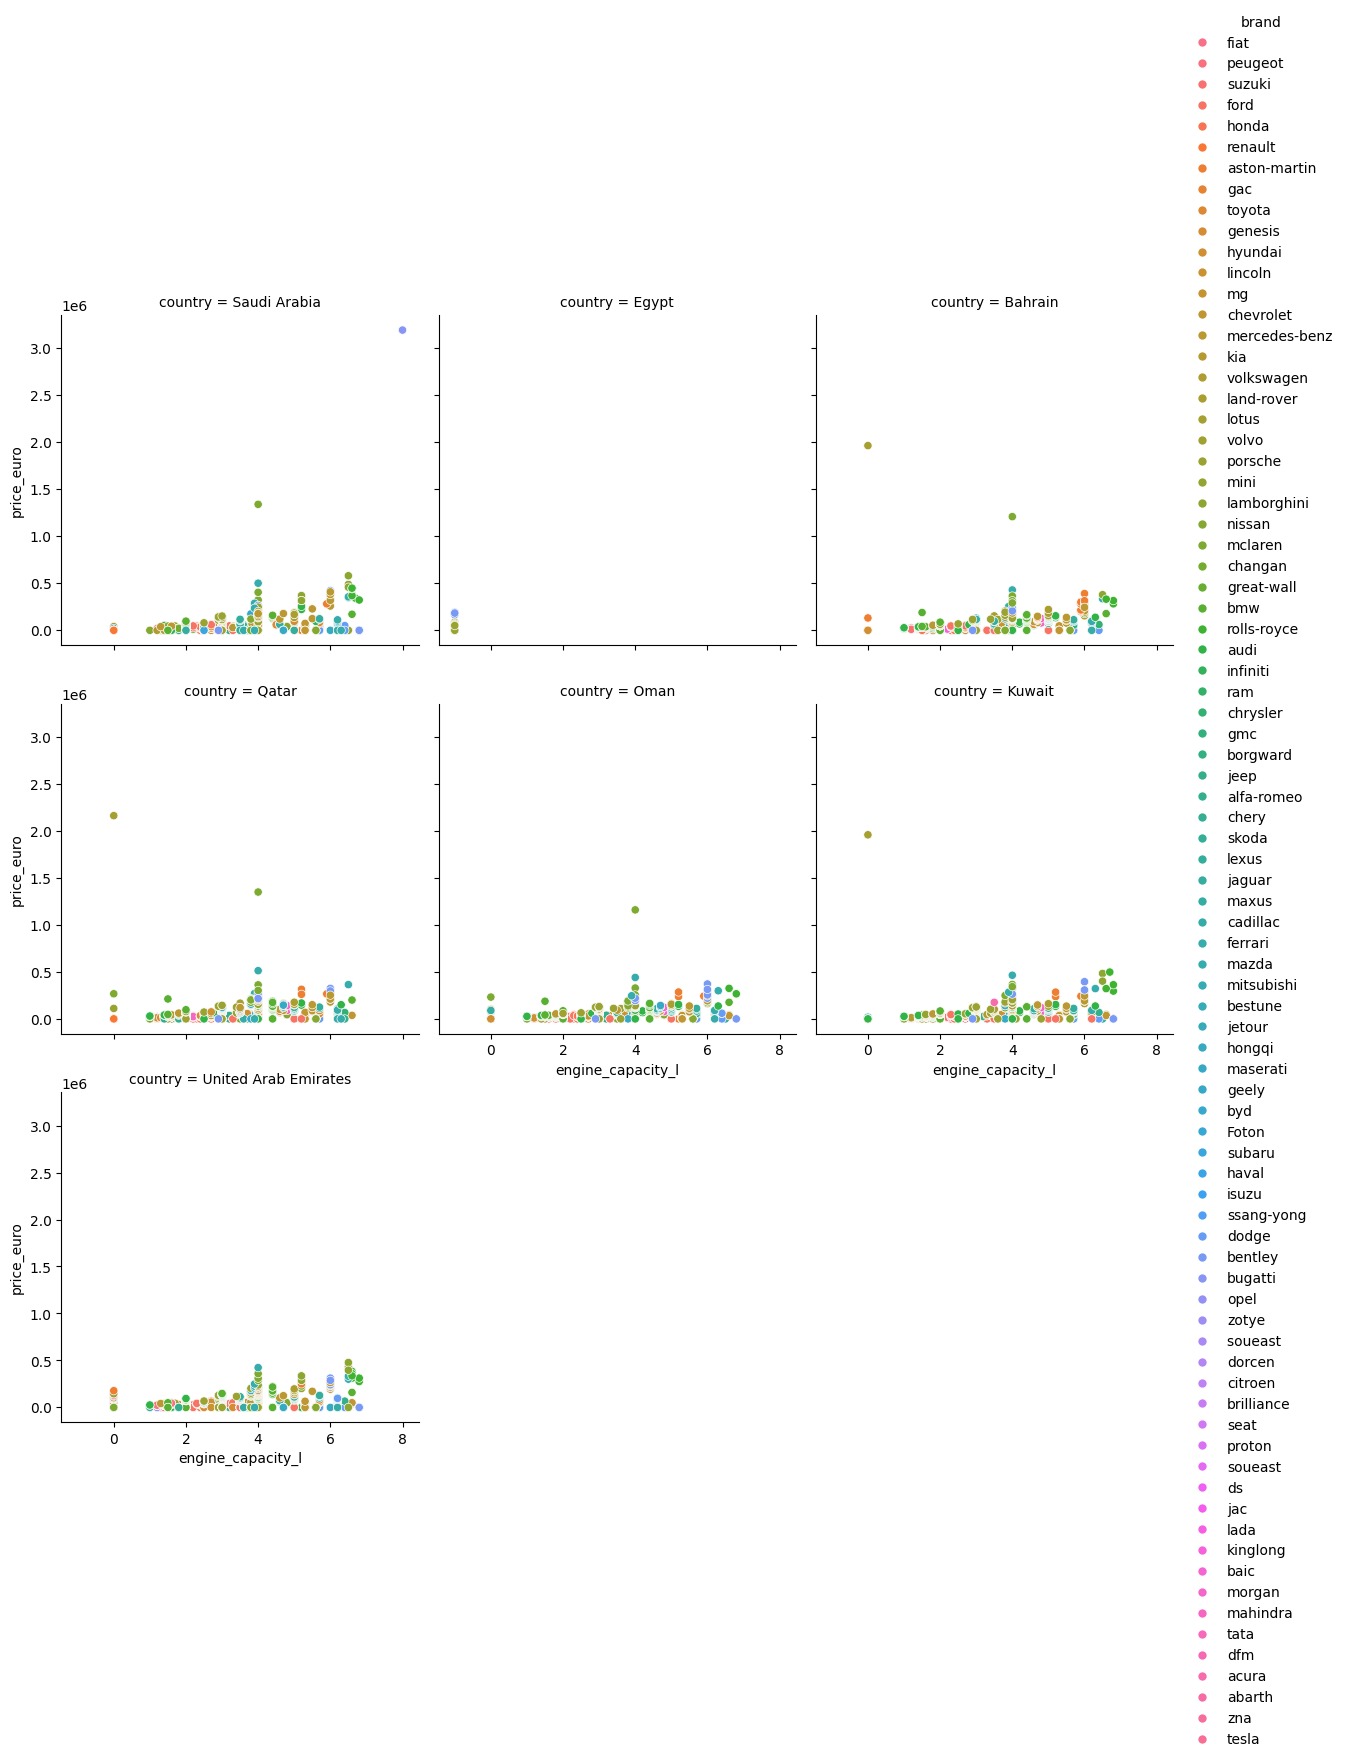



*** THE END OF OUR CAR CRAZY JOURNEY! ***


In [ ]:
# Report in a funny way!

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Now for the FUNNY report!

print("\n\n*** THE EPIC CAR DATA ADVENTURE! ***\n")

print("Hold onto your hats, folks, because we've unearthed some *hilarious* insights from this car data!")

# Pricey Pals by Country
print("\n\n**Pricey Pals by Country:**\nTurns out, some countries are *way* more extravagant with their rides. Check out the boxplot – it’s like a rollercoaster of prices!")
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='price_euro', data=df_upd)
plt.title('Price Distribution by Country (aka Where the Rich Kids Play)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Horsepower Havoc vs. Top Speed
print("\n\n**Horsepower Havoc vs. Top Speed:**\nBehold! The horsepower-top speed showdown. Some cars are like speedy cheetahs; others… well, let’s just say they're more like tortoises with spoilers. ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horse_power_cv', y='top_speed_kmh', data=df_upd, hue='brand', palette='viridis')
plt.title('Horsepower vs. Top Speed (Speed Demons vs. Grandma’s Car)')
plt.show()

# Brand Bonanza
print("\n\n**Brand Bonanza:**\nThis chart shows which brands are the most popular. Are they all awesome, or just popular by accident? You decide!")
plt.figure(figsize=(10, 6))
brand_counts = df_upd['brand'].value_counts()
plt.bar(brand_counts.index, brand_counts.values)
plt.xticks(rotation=90)
plt.title('Brand Popularity (Popularity Contest!)')
plt.tight_layout()
plt.show()


# Engine Capacity vs. Cylinder Number
print("\n\n**Engine Capacity vs. Cylinder Number:**\nHere we see how engine size relates to number of cylinders.  Does more cylinders *always* equal more speed? Find out below! And a bonus hint: Electric cars might mess with the traditional notions!")
plt.figure(figsize=(8,6))
sns.scatterplot(x='engine_capacity_l', y='cylinder_nr', data=df_upd, hue='is_eletric')
plt.title('Engine Capacity vs. Cylinder Number (Is Bigger Always Better?)')
plt.show()


print("\n\n**Price Distribution:** A histogram of the price distribution shows that most of the cars are on the cheaper end of the spectrum.")
plt.figure(figsize=(10, 6))
sns.histplot(df_upd['price_euro'], bins=30, kde=True) # KDE adds a smooth curve
plt.title('Price Distribution')
plt.xlabel('Price in Euros')
plt.ylabel('Frequency')
plt.show()


print("\n\n**Price vs. Engine by Country:** This series of plots explores how price and engine size interact across different countries. ")
sns.relplot(x="engine_capacity_l", y="price_euro", hue="brand", col="country", data=df_upd, col_wrap=3, height=4)
plt.show()


print("\n\n*** THE END OF OUR CAR CRAZY JOURNEY! ***")

/usr/local/lib/python3.11/dist-packages/seaborn/relational.py:733: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


PDF summary generated successfully!


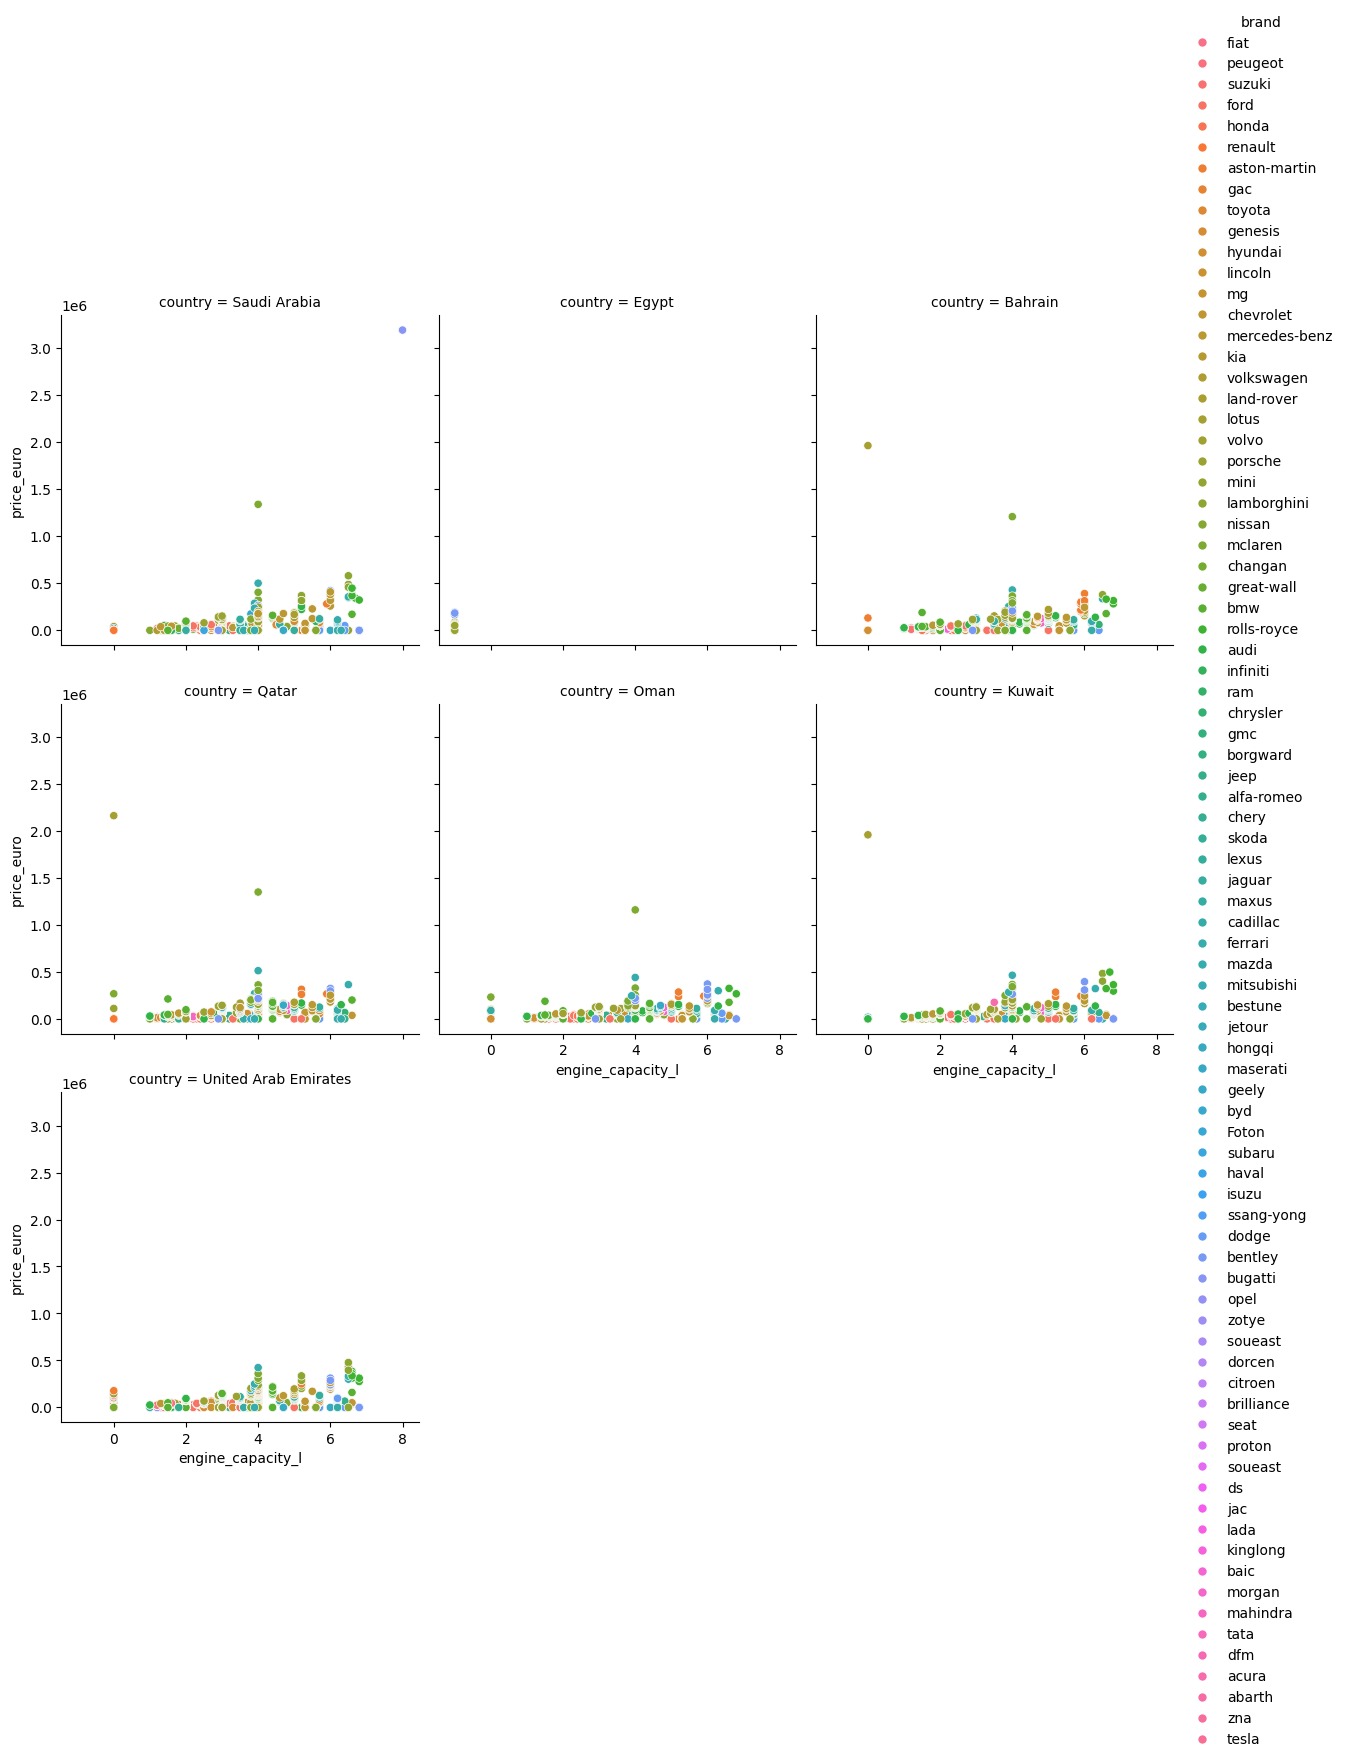

In [ ]:
# summary

!pip install reportlab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
from io import BytesIO

# Assuming df_upd is your processed DataFrame from the previous code

def create_pdf_summary(df, filename="car_data_summary.pdf"):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter

    # Function to add text with formatting to the PDF
    def add_text(text, y, size=10, bold=False):
        if bold:
            c.setFont("Helvetica-Bold", size)
        else:
            c.setFont("Helvetica", size)
        c.drawString(50, y, text)

    # Add a title to the PDF
    add_text("Car Data Summary", height - 50, size=16, bold=True)

    y_pos = height - 100  # Initial vertical position

    # Add a brief introduction
    intro_text = (
        "This report summarizes key insights from the car dataset. "
        "We explore price distribution, engine capacity, horsepower, and top speed, "
        "along with brand and country comparisons."
    )
    for line in intro_text.split(". "):
        add_text(line + ".", y_pos, size=10)
        y_pos -= 15

    # Iterate through plots and save them as images
    plots = []
    figures = [plt.figure() for _ in range(6)]

    sns.boxplot(x='country', y='price_euro', data=df, ax=figures[0].gca())
    figures[0].gca().set_title('Price Distribution by Country')
    sns.scatterplot(x='horse_power_cv', y='top_speed_kmh', data=df, hue='brand', palette='viridis', ax=figures[1].gca())
    figures[1].gca().set_title('Horsepower vs. Top Speed')
    figures[2].gca().bar(df['brand'].value_counts().index, df['brand'].value_counts().values)
    figures[2].gca().set_title('Brand Popularity')
    sns.scatterplot(x='engine_capacity_l', y='cylinder_nr', data=df, hue='is_eletric', ax=figures[3].gca())
    figures[3].gca().set_title('Engine Capacity vs. Cylinder Number')
    sns.histplot(df['price_euro'], bins=30, kde=True, ax=figures[4].gca())
    figures[4].gca().set_title('Price Distribution Histogram')
    sns.relplot(x="engine_capacity_l", y="price_euro", hue="brand", col="country", data=df, col_wrap=3, height=4, ax=figures[5].gca())
    figures[5].gca().set_title('Price vs Engine by Country')

    for i, fig in enumerate(figures):
        imgdata = BytesIO()
        fig.savefig(imgdata, format='png')
        imgdata.seek(0)  # rewind the data
        img = ImageReader(imgdata)
        plots.append(img)
        plt.close(fig)

    # Add plots to the PDF with titles
    plot_titles = [
        "Price Distribution by Country",
        "Horsepower vs. Top Speed",
        "Brand Popularity",
        "Engine Capacity vs. Cylinder Number",
        "Price Distribution",
        "Price vs. Engine Capacity by Country"
    ]
    for i, plot in enumerate(plots):
        c.drawImage(plot, 50, y_pos - 250, width=500, height=200)
        add_text(plot_titles[i], y_pos - 230, size=12, bold=True)
        y_pos -= 300


    c.save()


# Call the function to generate the PDF
create_pdf_summary(df_upd)

# Display a message to confirm the PDF has been generated
print("PDF summary generated successfully!")